In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import scipy.optimize as opt
from numpy.linalg import inv
from math import pi

#copyright Iason Myttas 

COURSEWORK QUESTION 21

In [14]:

#create some data
X = np.linspace(0,4*pi, 100)
N = 100

#pass nonlinear function
fnl1 = X*np.sin(X)
fnl2 = X*np.cos(X)

fnl = np.column_stack([fnl1,fnl2])

#pass linear function
A = np.random.normal(0,1,20)
A = A.reshape(10,2)

#We will try to estimate the true weights using these
C = np.random.normal(0,1,20)
C = C.reshape(10,2)


flin = fnl.dot(A.T).T
Y = flin


In [15]:
#marginal log 
def f(W, *args): 
    
    W = W.reshape(Wshape)
    invC = inv(np.dot(W,W.T)+np.identity(Wshape[0]))
    
    A = np.trace(invC.dot(Y.dot(Y.T)))
    B = np.log(np.linalg.det(np.dot(W,W.T)+np.identity(Wshape[0])))
    C = 10*np.log(2*pi)
    
    return (N/2)*(A + B + C)

def dfx(W, *args):
    
    dim1, dim2 = Wshape[0], Wshape[1]
    der = np.empty((dim1,dim2))
    
    #reshape W since it is flattened
    W = W.reshape(Wshape)

    invC = inv(np.dot(W,W.T)+np.identity(Wshape[0]))
#     print("invC shape", invC.shape)
    
    #loop once for the derivative in terms of each element of W
    for i in range(dim1):
        for j in range(dim2):
            
            #Create each J matrix for every derivative
            Jij = np.zeros((dim1,dim2))
            
            #set one element to 1 each time
            Jij[i,j] = 1
                        
            #we do not have to calculate for term C since its derivative is 0
            A = np.trace((-1)*np.dot(np.dot(Y,Y.T),np.dot(invC,np.dot(np.dot(W,Jij.T) + np.dot(Jij, W.T),invC))))
            B = np.trace(np.dot(invC,np.dot(W,Jij.T) + np.dot(Jij, W.T)))
            
            der[i,j] = (N/2)*(A + B)
    
    #1d so it can be returned
    der = der.reshape(20,)
    return der
            

Wshape = A.shape
Wprimes = opt.fmin_cg(f, C.flatten(), fprime=dfx, args=Wshape)
Wnew = Wprimes.reshape(Wshape)
print(Wprimes.shape)

print(Y.shape)
#not solving for X
predicts = np.dot(Y.T,Wnew)

#solve for X
predicts2 = np.dot(Y.T, np.dot(Wnew,inv(np.dot(Wnew.T,Wnew))))
# print(Wnew)
# print(Y)

Optimization terminated successfully.
         Current function value: 2013.333713
         Iterations: 105
         Function evaluations: 209
         Gradient evaluations: 209
(20,)
(10, 100)


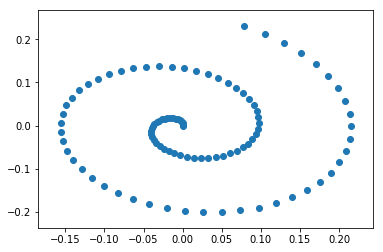

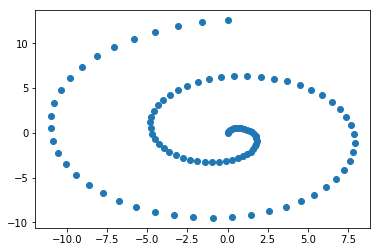

In [16]:
#plot learned plot
plt.figure(1)
plt.scatter(predicts2[:,0],predicts2[:,1])

#plot original plot
plt.figure(2)
plt.scatter(fnl[:,0],fnl[:,1])

(10, 100)


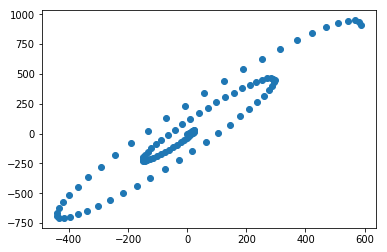

In [13]:
#trying with random parameters
B = np.random.normal(5,10,20)
B = B.reshape(10,2)

predicts_random = np.dot(Y.T,B)

print(Y.shape)
plt.scatter(predicts_random[:,0], predicts_random[:,1])

